In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import numpy as np

In [3]:
#Random Forrest

x = pd.read_csv("data_exercise_40.csv", usecols = range(1,120), header = 0)
x.fillna(x.mean(), inplace = True)
y = pd.read_csv("data_exercise_40.csv", usecols = range(120,121) , header = 0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

clf = RandomForestClassifier(n_estimators=4000,criterion='entropy',max_features=1,max_depth=None,min_samples_split=150,n_jobs=-1, verbose=1)
clf.fit(X_train,y_train.values.ravel())
predicted_labels = clf.predict(X_test)
accuracy_score(y_test, predicted_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:    8.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: 

0.21721311475409835

In [4]:
params = {
    'n_estimators': range(100,500,50),
    'max_depth' : [8, 9, 10, 11, 12],
    'max_features': ['auto'],
    'criterion':['gini']}

#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = clf, param_grid = params, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

KeyboardInterrupt: 

In [4]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best

getTrainScores(gsearch1)

({0: "mean:0.2407641782854007params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}",
  1: "mean:0.24194577352472088params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 150}",
  2: "mean:0.24370015948963317params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}",
  3: "mean:0.2378470614463823params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 250}",
  4: "mean:0.23843014182572758params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 300}",
  5: "mean:0.24018624273293204params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 350}",
  6: "mean:0.2390132222050728params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 400}",
  7: "mean:0.23843014182572758params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 450}",
  8: "mean:0.23901493714736502param

In [ ]:
clf2 = gsearch1.best_estimator_

params1 = {
    'n_estimators'      : range(200,300,10),
    'max_depth'         : [11, 12,13]
}

#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch2 = GridSearchCV(estimator = clf2, param_grid = params1, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch2.fit(X_train, y_train)

In [6]:
getTrainScores(gsearch2)

({0: "mean:0.24194577352472088params{'max_depth': 11, 'n_estimators': 200}",
  1: "mean:0.23783677179262916params{'max_depth': 11, 'n_estimators': 210}",
  2: "mean:0.24018967261751642params{'max_depth': 11, 'n_estimators': 220}",
  3: "mean:0.23959801752671023params{'max_depth': 11, 'n_estimators': 230}",
  4: "mean:0.23784020167721356params{'max_depth': 11, 'n_estimators': 240}",
  5: "mean:0.24077103805456943params{'max_depth': 11, 'n_estimators': 250}",
  6: "mean:0.23784020167721356params{'max_depth': 11, 'n_estimators': 260}",
  7: "mean:0.23784363156179794params{'max_depth': 11, 'n_estimators': 270}",
  8: "mean:0.23843014182572758params{'max_depth': 11, 'n_estimators': 280}",
  9: "mean:0.23784534650409012params{'max_depth': 11, 'n_estimators': 290}",
  10: "mean:0.23667061103393872params{'max_depth': 12, 'n_estimators': 200}",
  11: "mean:0.23901150726278061params{'max_depth': 12, 'n_estimators': 210}",
  12: "mean:0.2425322837886505params{'max_depth': 12, 'n_estimators': 220}

In [7]:
clf3 = gsearch2.best_estimator_

params2 = {
    'n_estimators'      : range(200,220,5),
    'max_depth'         : [13,14,15]
}

#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch3 = GridSearchCV(estimator = clf3, param_grid = params2, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch3.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   49.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   49.4s finished
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=13,
                                              min_samples_split=150,
                                              n_estimators=290, n_jobs=-1,
                                              verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [13, 14, 15],
                         'n_estimators': range(200, 220, 5)},
             scoring='f1_micro', verbose=10)

In [8]:
getTrainScores(gsearch3)

({0: "mean:0.23843014182572758params{'max_depth': 13, 'n_estimators': 200}",
  1: "mean:0.24077618288144603params{'max_depth': 13, 'n_estimators': 205}",
  2: "mean:0.23784020167721356params{'max_depth': 13, 'n_estimators': 210}",
  3: "mean:0.2366671811493543params{'max_depth': 13, 'n_estimators': 215}",
  4: "mean:0.24369844454734096params{'max_depth': 14, 'n_estimators': 200}",
  5: "mean:0.24077446793915383params{'max_depth': 14, 'n_estimators': 205}",
  6: "mean:0.2366671811493543params{'max_depth': 14, 'n_estimators': 210}",
  7: "mean:0.23784534650409012params{'max_depth': 14, 'n_estimators': 215}",
  8: "mean:0.24252885390406612params{'max_depth': 15, 'n_estimators': 200}",
  9: "mean:0.24253399873094267params{'max_depth': 15, 'n_estimators': 205}",
  10: "mean:0.24077103805456948params{'max_depth': 15, 'n_estimators': 210}",
  11: "mean:0.2413541184339147params{'max_depth': 15, 'n_estimators': 215}"},
 {'best_mean': 0.24369844454734096,
  'best_param': {'max_depth': 14, 'n_est

In [9]:
clf4 = gsearch3.best_estimator_

params3 = {
    'max_depth'         : range(14,20,1)
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch4 = GridSearchCV(estimator = clf4, param_grid = params3, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch4.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   22.7s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   24.1s finished
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.9s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=14,
                                              min_samples_split=150,
                                              n_estimators=200, n_jobs=-1,
                                              verbose=1),
             n_jobs=-1, param_grid={'max_depth': range(14, 20)},
             scoring='f1_micro', verbose=10)

In [10]:
getTrainScores(gsearch4)

({0: "mean:0.24077103805456948params{'max_depth': 14}",
  1: "mean:0.23843185676801976params{'max_depth': 15}",
  2: "mean:0.2407778978237382params{'max_depth': 16}",
  3: "mean:0.23960144741129458params{'max_depth': 17}",
  4: "mean:0.23667061103393872params{'max_depth': 18}",
  5: "mean:0.24194577352472088params{'max_depth': 19}"},
 {'best_mean': 0.24194577352472088, 'best_param': {'max_depth': 19}})

In [11]:
clf5 = gsearch4.best_estimator_

params4 = {
    'max_depth'         : range(19,50,2)
}

#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch5 = GridSearchCV(estimator = clf5, param_grid = params4, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch5.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent 

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=19,
                                              min_samples_split=150,
                                              n_estimators=200, n_jobs=-1,
                                              verbose=1),
             n_jobs=-1, param_grid={'max_depth': range(19, 50, 2)},
             scoring='f1_micro', verbose=10)

In [12]:
getTrainScores(gsearch5)

({0: "mean:0.24135926326079127params{'max_depth': 19}",
  1: "mean:0.2425322837886505params{'max_depth': 21}",
  2: "mean:0.24545969028142203params{'max_depth': 23}",
  3: "mean:0.23843014182572758params{'max_depth': 25}",
  4: "mean:0.23725197647099178params{'max_depth': 27}",
  5: "mean:0.24077103805456948params{'max_depth': 29}",
  6: "mean:0.2425254240194817params{'max_depth': 31}",
  7: "mean:0.24076589322769287params{'max_depth': 33}",
  8: "mean:0.23901836703194937params{'max_depth': 35}",
  9: "mean:0.24311879405258013params{'max_depth': 37}",
  10: "mean:0.23608238582771687params{'max_depth': 39}",
  11: "mean:0.23784020167721356params{'max_depth': 41}",
  12: "mean:0.24076760816998508params{'max_depth': 43}",
  13: "mean:0.23901493714736496params{'max_depth': 45}",
  14: "mean:0.24136269314537567params{'max_depth': 47}",
  15: "mean:0.24253056884635832params{'max_depth': 49}"},
 {'best_mean': 0.24545969028142203, 'best_param': {'max_depth': 23}})

In [13]:
clf6 = gsearch5.best_estimator_

params5 = {
    'max_depth'         : [24,25,26]
}

#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch6 = GridSearchCV(estimator = clf6, param_grid = params5, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch6.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:   10.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   11.6s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.1s finished
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=23,
                                              min_samples_split=150,
                                              n_estimators=200, n_jobs=-1,
                                              verbose=1),
             n_jobs=-1, param_grid={'max_depth': [24, 25, 26]},
             scoring='f1_micro', verbose=10)

In [14]:
getTrainScores(gsearch6)

({0: "mean:0.24018795767522422params{'max_depth': 24}",
  1: "mean:0.23843357171031193params{'max_depth': 25}",
  2: "mean:0.24311193428341138params{'max_depth': 26}"},
 {'best_mean': 0.24311193428341138, 'best_param': {'max_depth': 26}})

In [15]:
final_clf = gsearch6.best_estimator_

In [17]:
final_clf.fit(X_train, y_train)
predicted_labels = final_clf.predict(X_test)
train_pred = final_clf.predict(X_train)

print('Train Accuracy:' + str(accuracy_score(y_train, train_pred)))
print('Train F1-Score(Micro):' + str(f1_score(y_train, train_pred, average= 'micro')))
print('------')
print('Test Accuracy:'+str(accuracy_score(y_test, predicted_labels)))
print('Test F1-Score(Micro):'+str(f1_score(y_test, predicted_labels,average= 'micro')))

<ipython-input-17-cd8a5e202ee7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_clf.fit(X_train, y_train)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


Train Accuracy:0.309900410076157
Train F1-Score(Micro):0.309900410076157
------
Test Accuracy:0.22404371584699453
Test F1-Score(Micro):0.22404371584699453


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


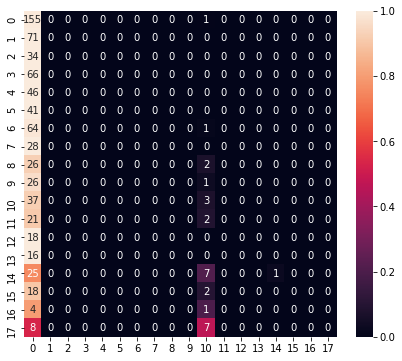

In [7]:
cm = confusion_matrix(y_test, predicted_labels)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g')

plot_confusion_matrix(cm)

In [ ]:
from sklearn.metrics import cohen_kappa_score

print( "kappa score:  ", cohen_kappa_score(y_test, predictions))